In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class_means=np.array([[+0.0,+2.5],
                      [-2.5,-2.0],
                      [+2.5,-2.0]])

class_covariances=np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, -0.8], 
                               [-0.8, +1.2]],
                           [[+1.2,+0.8],
                            [+0.8,+1.2]]])

class_sizes = np.array([120, 90,90])

In [3]:
points1=np.random.multivariate_normal(class_means[0,:],class_covariances[0,:,:],class_sizes[0])
points2=np.random.multivariate_normal(class_means[1,:],class_covariances[1,:,:],class_sizes[1])
points3=np.random.multivariate_normal(class_means[2,:],class_covariances[2,:,:],class_sizes[2])
x=np.vstack((points1,points2,points3))


y=np.concatenate((np.repeat(1,class_sizes[0])
                  ,np.repeat(2,class_sizes[1])
                  ,np.repeat(3,class_sizes[2])))

data=np.hstack((x, y[:, None]))

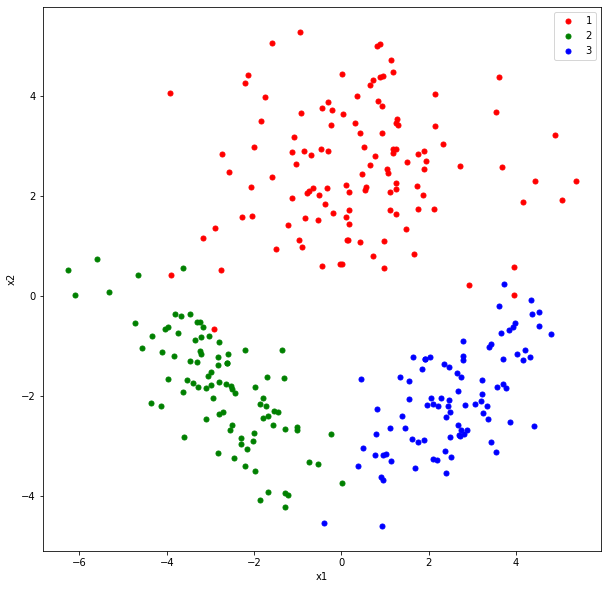

In [4]:
plt.figure(figsize=(10,10))
plt.plot(points1[:,0],points1[:,1],"r.",markersize=10)
plt.plot(points2[:,0],points2[:,1],"g.",markersize=10)
plt.plot(points3[:,0],points3[:,1],"b.",markersize=10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend("123")
plt.show()

In [5]:
sample_means=np.array([[np.mean(data[:,0][y==c+1]) for c in range(3)],
              [np.mean(data[:,1][y==c+1]) for c in range(3)]])
sample_means

array([[ 0.37036275, -2.78537811,  2.5589569 ],
       [ 2.52371211, -1.80608257, -2.0693482 ]])

In [6]:
sample_covariances=[np.cov(data[:,0][y==c+1],data[:,1][y==c+1]) for c in range(3)]
sample_covariances

[array([[3.39022489, 0.09716825],
        [0.09716825, 1.52630993]]), array([[ 1.48573613, -1.0245553 ],
        [-1.0245553 ,  1.26763109]]), array([[1.31755292, 0.7388647 ],
        [0.7388647 , 0.99592946]])]

In [7]:
class_priors=[np.mean([y==c+1]) for c in range(3)]
print(class_priors)

[0.4, 0.3, 0.3]


In [8]:
W=np.array([-0.5*np.linalg.inv(sample_covariances[c]) for c in range(3)])
W

array([[[-0.14775244,  0.00940625],
        [ 0.00940625, -0.32818629]],

       [[-0.76028815, -0.61449838],
        [-0.61449838, -0.89110119]],

       [[-0.64985652,  0.48211852],
        [ 0.48211852, -0.85971988]]])

In [9]:
w=np.array([np.matmul(np.linalg.inv(sample_covariances[c]),sample_means[:,c]) for c in range(3)])
w

array([[ 0.06196669,  1.64952796],
       [-6.45504955, -6.6420253 ],
       [ 5.32125186, -6.02556064]])

In [14]:
x.shape


(300, 2)

In [10]:
w0=[-0.5*np.matmul(np.transpose(sample_means[:,c]),
                  np.matmul(np.linalg.inv(sample_covariances[c]),
                  sample_means[:,c]))
   for c in range(3)]
w0

[-2.092941921674553, -14.987899911356774, -13.042918604113304]

In [11]:
x=data[:,[0,1]]
y=data[:,2].astype(int)

In [12]:
score_values=[np.diag(
    np.matmul(x,np.matmul(W[c],np.transpose(x)))
    )
    +np.matmul(w[c],np.transpose(x))
    +w0[c] for c in range(3)]

In [13]:
np.array(score_values).shape

(3, 300)

In [ ]:
y_predicted = np.argmax(score_values, axis = 0)+1
confusion_matrix = pd.crosstab(y_predicted, y, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        118   0   1
2          1  90   1
3          1   0  88


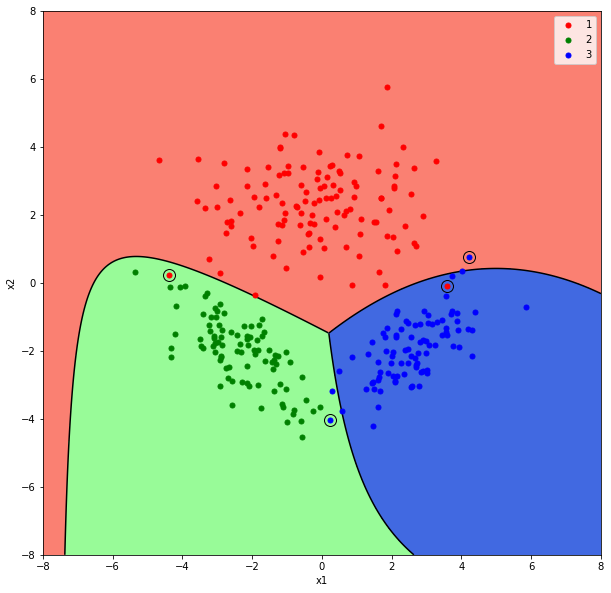

In [ ]:
x1_interval = np.linspace(-8, +8, 1201)
x2_interval = np.linspace(-8, +8, 1201)
X1, X2 = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), 3))
for c in range(3):
    discriminant_values[:,:,c] = X1*(W[c,0,0]*X1+W[c,0,1]*X2)+X2*(W[c,1,0]+W[c,1,1]*X1)+X1*w[c,0]+X2*w[c,1]+w0[c]

C1 = discriminant_values[:,:,0]
C2 = discriminant_values[:,:,1]
C3 = discriminant_values[:,:,2]
C1[(C1 < C2) & (C1 < C3)] = np.nan
C2[(C2 < C1) & (C2 < C3)] = np.nan
C3[(C3 < C1) & (C3< C2)] = np.nan
discriminant_values[:,:,0] = C1
discriminant_values[:,:,1] = C2
discriminant_values[:,:,2] = C3

plt.figure(figsize = (10, 10))
plt.plot(x[y == 1, 0], x[y == 1, 1], "r.", markersize = 10)
plt.plot(x[y == 2, 0], x[y == 2, 1], "g.", markersize = 10)
plt.plot(x[y == 3, 0], x[y == 3, 1], "b.", markersize = 10)
plt.plot(x[y_predicted != y, 0], x[y_predicted != y, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(X1, X2, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(X1, X2, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(X1, X2, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
C1[(C1 < C2) | (C1 < C3)] = np.nan
C2[(C2 < C1) | (C2 < C3)] = np.nan
C3[(C3 < C1) | (C3< C2)] = np.nan
plt.contourf(X1, X2, C1, levels = 0, colors = "salmon")
plt.contourf(X1, X2, C2, levels = 0, colors = "palegreen")
plt.contourf(X1, X2, C3, levels = 0, colors = "royalblue")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend("123")
plt.show()